In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.7.0'

In [4]:
keras.__version__

'2.7.0'

In [5]:
fashion = keras.datasets.fashion_mnist

In [6]:
(x_train_full, y_train_full), (x_test, y_test) = fashion.load_data()

In [7]:
x_train_full.shape, x_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [8]:
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_train.shape

(55000,)

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]

In [18]:
hidden1.name

'dense'

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[-0.03609753,  0.00046924, -0.03147923, ..., -0.0110072 ,
         0.04179557,  0.01141975],
       [-0.02004261, -0.03597155,  0.01872754, ...,  0.06150809,
        -0.03017739, -0.02616867],
       [ 0.05467992,  0.02793358, -0.02588293, ...,  0.02817213,
        -0.00562721, -0.00831632],
       ...,
       [ 0.01859305,  0.06612404,  0.0269112 , ..., -0.00699269,
        -0.04070241,  0.00051058],
       [ 0.0413871 ,  0.05644543,  0.03829154, ...,  0.05579691,
        -0.0339529 , -0.06449166],
       [ 0.02707795,  0.01054512,  0.02391907, ..., -0.05557429,
        -0.06962156,  0.04959222]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=30,validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7331 - accuracy: 0.7592 - val_loss: 0.5195 - val_accuracy: 0.8162
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4902 - accuracy: 0.8299 - val_loss: 0.4514 - val_accuracy: 0.8474
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4441 - accuracy: 0.8451 - val_loss: 0.4548 - val_accuracy: 0.8416
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4166 - accuracy: 0.8537 - val_loss: 0.4006 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3960 - accuracy: 0.8603 - val_loss: 0.3782 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3784 - accuracy: 0.8663 - val_loss: 0.3687 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3648 - accuracy: 0.8707 - val_loss: 0.3582 - val_accuracy:

(0.0, 1.0)

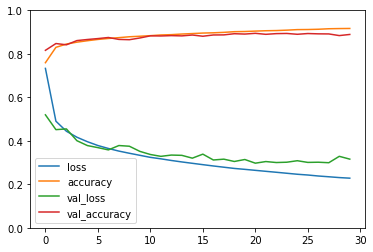

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
# plt.grid(True)
plt.gca().set_ylim(0,1)

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 55.3404 - accuracy: 0.8611


[55.340370178222656, 0.8611000180244446]

In [27]:
x_new = x_test[:3]

In [28]:
y_proba = model.predict(x_new)

In [29]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred = model.predict_classes(x_new)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [31]:
import numpy as np
y_pred=model.predict(x_new)
classes_x=np.argmax(y_pred,axis=1)

In [32]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
classes_x

array([9, 2, 1], dtype=int64)

In [34]:
np.array(class_names)[classes_x]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
##

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
housing = fetch_california_housing()

In [38]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [39]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [40]:
scaler = StandardScaler()

In [41]:
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

In [43]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [44]:
history = model.fit(x_train, y_train, epochs=20,
    validation_data=(x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8972 - val_loss: 0.6526
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6832 - val_loss: 0.4997
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4478 - val_loss: 0.4731
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4321 - val_loss: 0.4558
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4178 - val_loss: 0.4524
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4119 - val_loss: 0.4441
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4092 - val_loss: 0.4391
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4047 - val_loss: 0.4340
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3973 - val_loss: 0.4291
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3894 - val_loss: 0.4213

In [45]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4039


In [46]:
x_new = x_test[:3]

In [47]:
y_pred = model.predict(x_new)

In [48]:
y_pred

array([[1.0220432],
       [1.9600621],
       [0.905336 ]], dtype=float32)

In [49]:
input_ = keras.layers.Input(shape=x_train.shape[1:])

In [50]:
hidden1 = keras.layers.Dense(30, activation='relu')(input_)

In [51]:
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

In [52]:
concat = keras.layers.Concatenate()([input_, hidden2])

In [53]:
output = keras.layers.Dense(1)(concat)

In [54]:
model = keras.Model(inputs=[input_], outputs=[output])

In [55]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [56]:
history = model.fit(x_train, y_train, epochs=20,
    validation_data=(x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7063 - val_loss: 0.6877
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7653 - val_loss: 0.7512
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 2.9322 - val_loss: 6.9573
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 88.2119 - val_loss: 21.7280
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 13.7980 - val_loss: 57.1993
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 33.8059 - val_loss: 145.6752
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 1412.5762 - val_loss: 389.6755
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 4299.3931 - val_loss: 1089.0681
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 9521.2910 - val_loss: 2554.6738
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 2

In [57]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 1431240.7500


In [58]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])


In [61]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]
history = model.fit((x_train_A, x_train_B), y_train, epochs=20,
 validation_data=((x_valid_A, x_valid_B), y_valid))
mse_test = model.evaluate((x_test_A, x_test_B), y_test)
y_pred = model.predict((x_new_A, x_new_B))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.3719 - val_loss: 0.9150
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7841 - val_loss: 0.6772
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6063 - val_loss: 0.6121
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5584 - val_loss: 0.5824
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5356 - val_loss: 0.5670
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5208 - val_loss: 0.5552
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5102 - val_loss: 0.5496
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5019 - val_loss: 0.5395
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4948 - val_loss: 0.5317
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4891 - val_loss: 0.5261

In [62]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])


In [63]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")


In [65]:
history = model.fit(
 [x_train_A, x_train_B], [y_train, y_train], epochs=20,
 validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.0177 - main_output_loss: 0.9455 - aux_output_loss: 1.6672 - val_loss: 0.5420 - val_main_output_loss: 0.4940 - val_aux_output_loss: 0.9743
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5041 - main_output_loss: 0.4606 - aux_output_loss: 0.8962 - val_loss: 0.5086 - val_main_output_loss: 0.4717 - val_aux_output_loss: 0.8409
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4636 - main_output_loss: 0.4274 - aux_output_loss: 0.7892 - val_loss: 0.4844 - val_main_output_loss: 0.4560 - val_aux_output_loss: 0.7394
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4501 - main_output_loss: 0.4216 - aux_output_loss: 0.7063 - val_loss: 0.4666 - val_main_output_loss: 0.4410 - val_aux_output_loss: 0.6974
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4329 - main_output_loss: 0.4070 - aux_output_loss: 0.6662 - val_loss

In [66]:
total_loss, main_loss, aux_loss = model.evaluate(
 [x_test_A, x_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3918 - main_output_loss: 0.3799 - aux_output_loss: 0.4988


In [68]:
y_pred_main, y_pred_aux = model.predict([x_new_A, x_new_B])

In [70]:
class WideAndDeepModel(keras.Model):
 def __init__(self, units=30, activation="relu", **kwargs):
     super().__init__(**kwargs) # handles standard args (e.g., name)
     self.hidden1 = keras.layers.Dense(units, activation=activation)
     self.hidden2 = keras.layers.Dense(units, activation=activation)
     self.main_output = keras.layers.Dense(1)
     self.aux_output = keras.layers.Dense(1)
 def call(self, inputs):
     input_A, input_B = inputs
     hidden1 = self.hidden1(input_B)
     hidden2 = self.hidden2(hidden1)
     concat = keras.layers.concatenate([input_A, hidden2])
     main_output = self.main_output(concat)
     aux_output = self.aux_output(hidden2)
     return main_output, aux_output
model = WideAndDeepModel()